### Ghouls, Goblins, and Ghosts... Boo!

#### Нурдолотова С. 20930

In [26]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

In [3]:
train.head()


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
train.shape  


(371, 7)

In [7]:
test.head()


,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [6]:
test.shape 

(529, 6)

In [8]:
train.columns

Index(['id', 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul',
       'color', 'type'],
      dtype='object')

In [9]:
train.isnull().sum() # Number of null values in each column

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

In [10]:
#drop id column
df = train.drop('id', axis = 1)
df.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [11]:
train.color.value_counts()

white    137
clear    120
green     42
black     41
blue      19
blood     12
Name: color, dtype: int64

<AxesSubplot:xlabel='color', ylabel='count'>

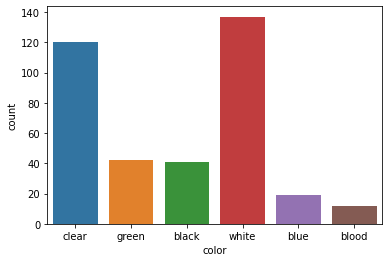

In [17]:
import seaborn as sns

sns.countplot(train.color)

# Большая часть существ либо белые, либо прозрачные

<AxesSubplot:xlabel='color', ylabel='count'>

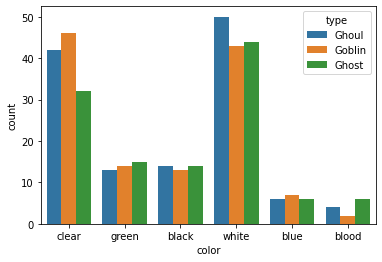

In [18]:
sns.countplot(train.color, hue = train.type)

# Этот график дает четкую визуализацию того, 
# как различные существа распределены по различным цветовым категориям.

In [19]:
train.type.value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

In [20]:
# Обучение на столбце - color
# Для кодирования используем one-hot

color_ohe = pd.get_dummies(df.color)
color_ohe.head()

,black,blood,blue,clear,green,white
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0


In [21]:
tg = pd.DataFrame()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train.type)
tg['target'] = le.fit_transform(train['type'])
tg.head()

,target
0,1
1,2
2,1
3,1
4,0


In [22]:
df.drop('color', axis = 1, inplace = True)
df.head()

,bone_length,rotting_flesh,hair_length,has_soul,type
0,0.354512,0.350839,0.465761,0.781142,Ghoul
1,0.575560,0.425868,0.531401,0.439899,Goblin
2,0.467875,0.354330,0.811616,0.791225,Ghoul
3,0.776652,0.508723,0.636766,0.884464,Ghoul
4,0.566117,0.875862,0.418594,0.636438,Ghost


In [24]:
tr = pd.concat([df, color_ohe], axis = 1)
tr.drop(['type'], axis = 1, inplace = True)
tr.head()

,bone_length,rotting_flesh,hair_length,has_soul,black,blood,blue,clear,green,white
0,0.354512,0.350839,0.465761,0.781142,0,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,0,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,1,0,0,0,0,0
3,0.776652,0.508723,0.636766,0.884464,1,0,0,0,0,0
4,0.566117,0.875862,0.418594,0.636438,0,0,0,0,1,0


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tr, tg, test_size = 0.2)

X_train.shape, X_test.shape

((296, 10), (75, 10))

In [30]:
t = test.drop('id', axis = 1)
col_ohe = pd.get_dummies(t['color'])
t.drop('color', axis = 1, inplace = True)
te = pd.concat([t,col_ohe], axis = 1)
te.head()

,bone_length,rotting_flesh,hair_length,has_soul,black,blood,blue,clear,green,white
0,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0
1,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1
2,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0
3,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1
4,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0


In [31]:
tr.head()

,bone_length,rotting_flesh,hair_length,has_soul,black,blood,blue,clear,green,white
0,0.354512,0.350839,0.465761,0.781142,0,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,0,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,1,0,0,0,0,0
3,0.776652,0.508723,0.636766,0.884464,1,0,0,0,0,0
4,0.566117,0.875862,0.418594,0.636438,0,0,0,0,1,0


In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 2, solver = 'liblinear', penalty = 'l1')
lr.fit(tr,tg)
te_pred = lr.predict(te)

In [36]:
sub = pd.DataFrame({'id': test['id'],
                   'type': te_pred})

sub['type'].replace({ 1: 'Ghoul',
                    0: 'Ghost',
                    2: 'Goblin'
                    }, inplace = True)
sub.head()



,id,type
0,3,Ghoul
1,6,Ghoul
2,9,Ghoul
3,10,Ghost
4,13,Ghost


In [37]:
sub.to_csv('submission.csv', index = False)